In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv ("/content/Lung_cancer.csv")

In [ ]:
df.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


In [ ]:
df.shape

(3000, 16)

In [ ]:
df.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC_DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL_CONSUMING         int64
COUGHING                  int64
SHORTNESS_OF_BREATH       int64
SWALLOWING_DIFFICULTY     int64
CHEST_PAIN                int64
LUNG_CANCER              object
dtype: object

In [ ]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,55.169000,1.491000,1.514000,1.494000,1.499000,1.509667,1.489667,1.506667,1.497333,1.491333,1.510667,1.488000,1.489667,1.498667
std,14.723746,0.500002,0.499887,0.500047,0.500082,0.499990,0.499977,0.500039,0.500076,0.500008,0.499970,0.499939,0.499977,0.500082
min,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,55.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,68.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,80.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(2998, 16)

In [ ]:
# Mapping the values
binary_mapping = {1: 0, 2: 1}
df.replace(binary_mapping, inplace=True)

gender_mapping = {'M': 1, 'F': 2}
lung_cancer_mapping = {'NO': 0, 'YES': 1}

df['GENDER'] = df['GENDER'].map(gender_mapping)
df['LUNG_CANCER'] = df['LUNG_CANCER'].map(lung_cancer_mapping)

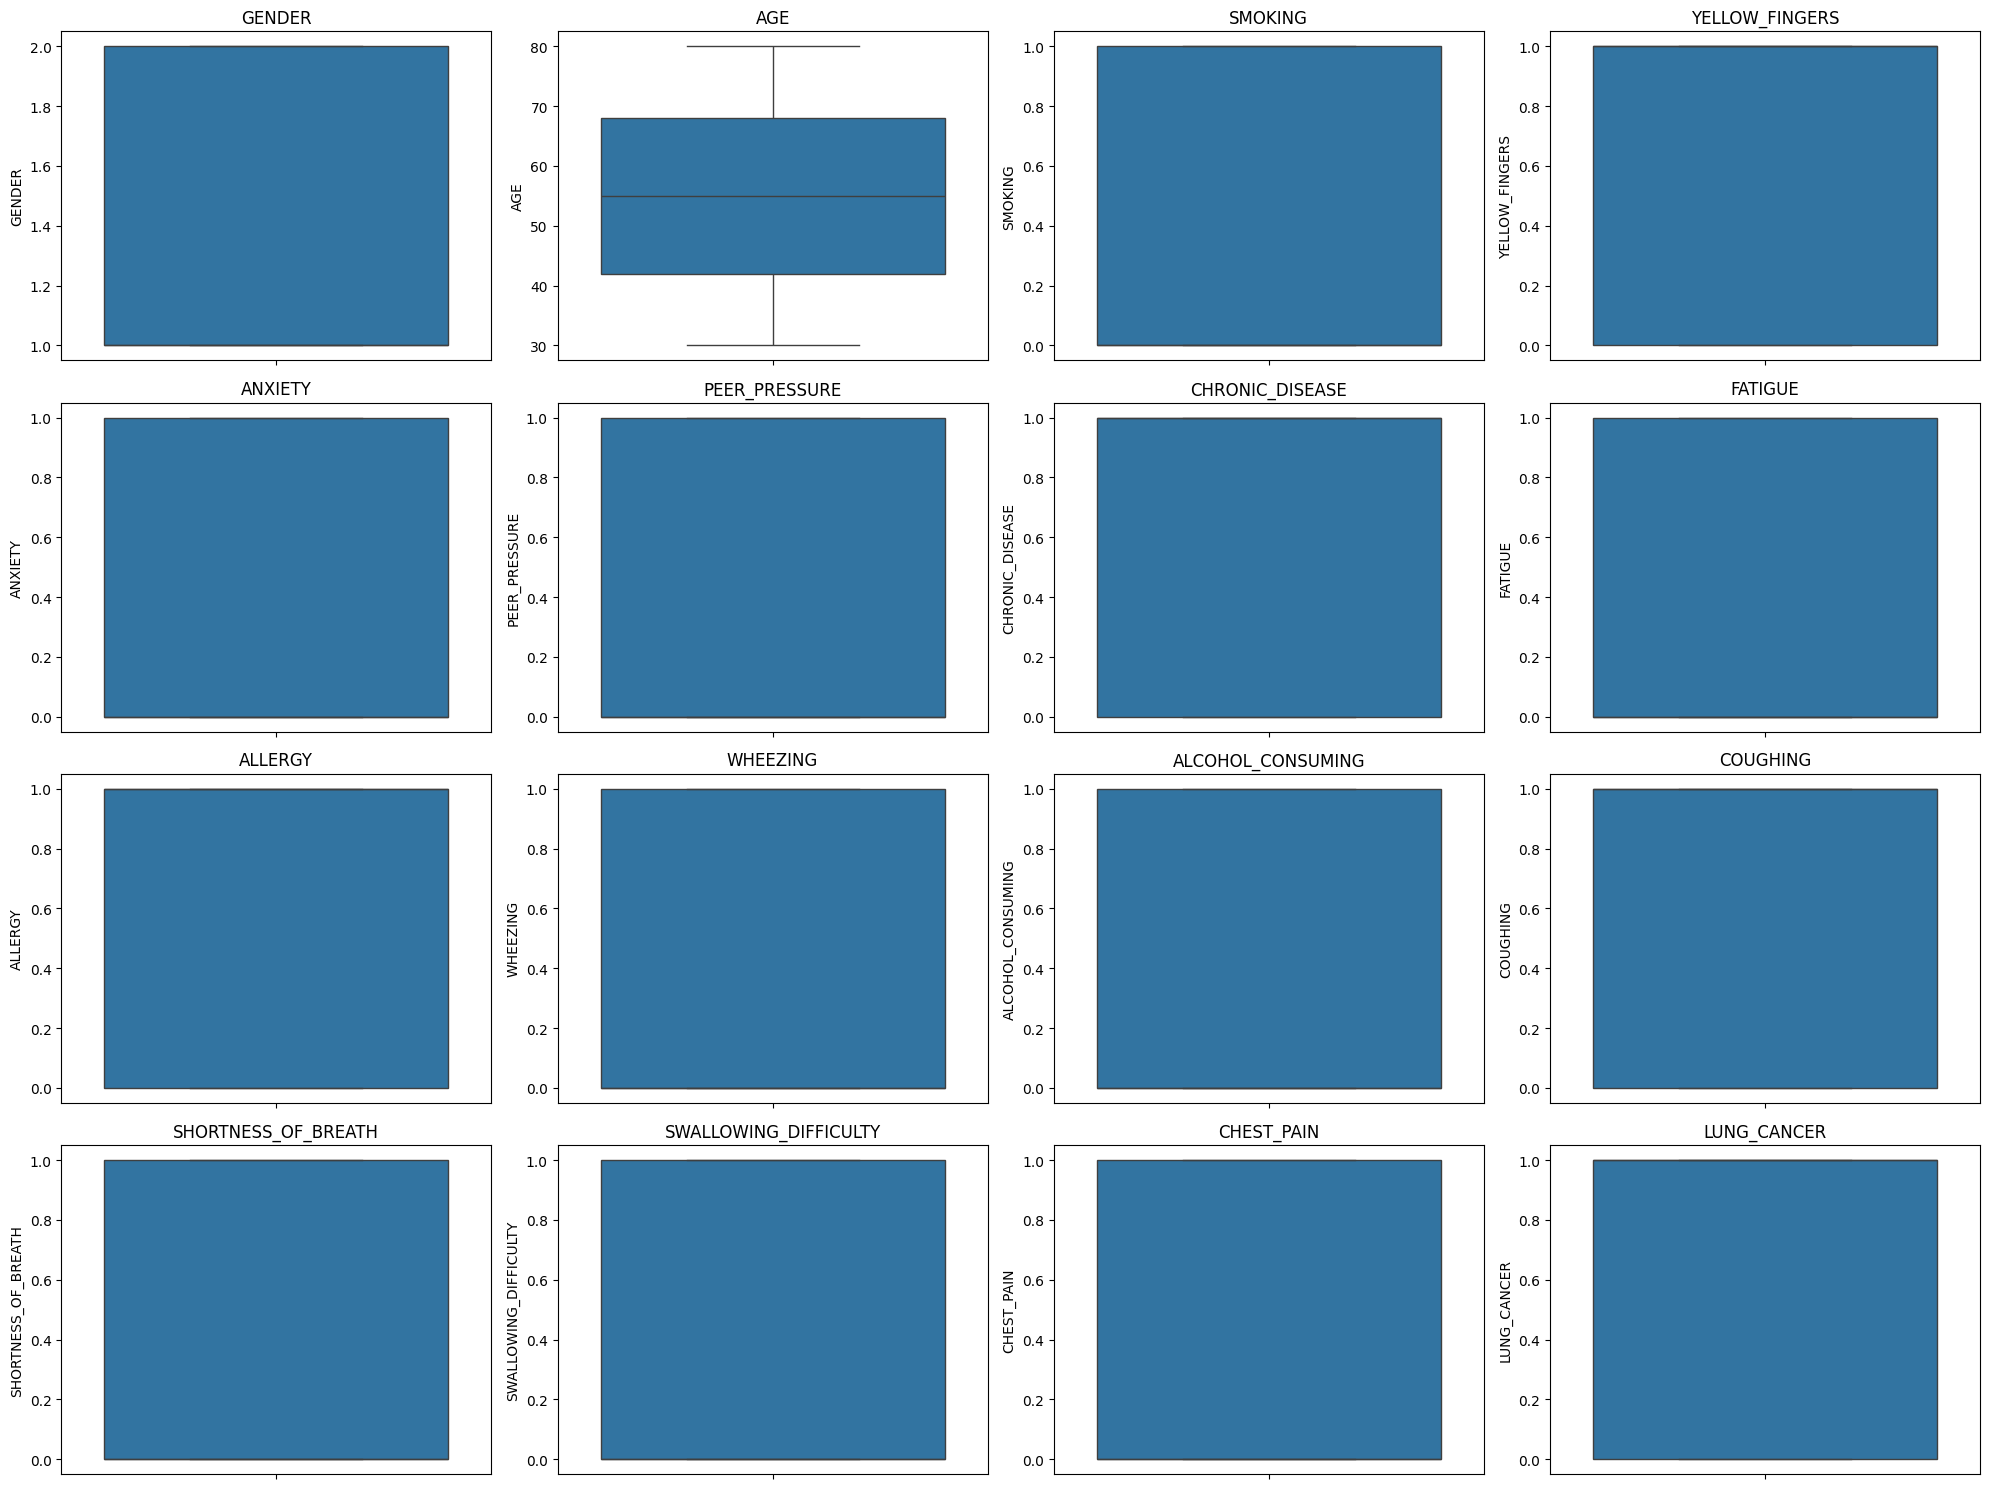

In [ ]:
# Plotting box plots for each feature
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

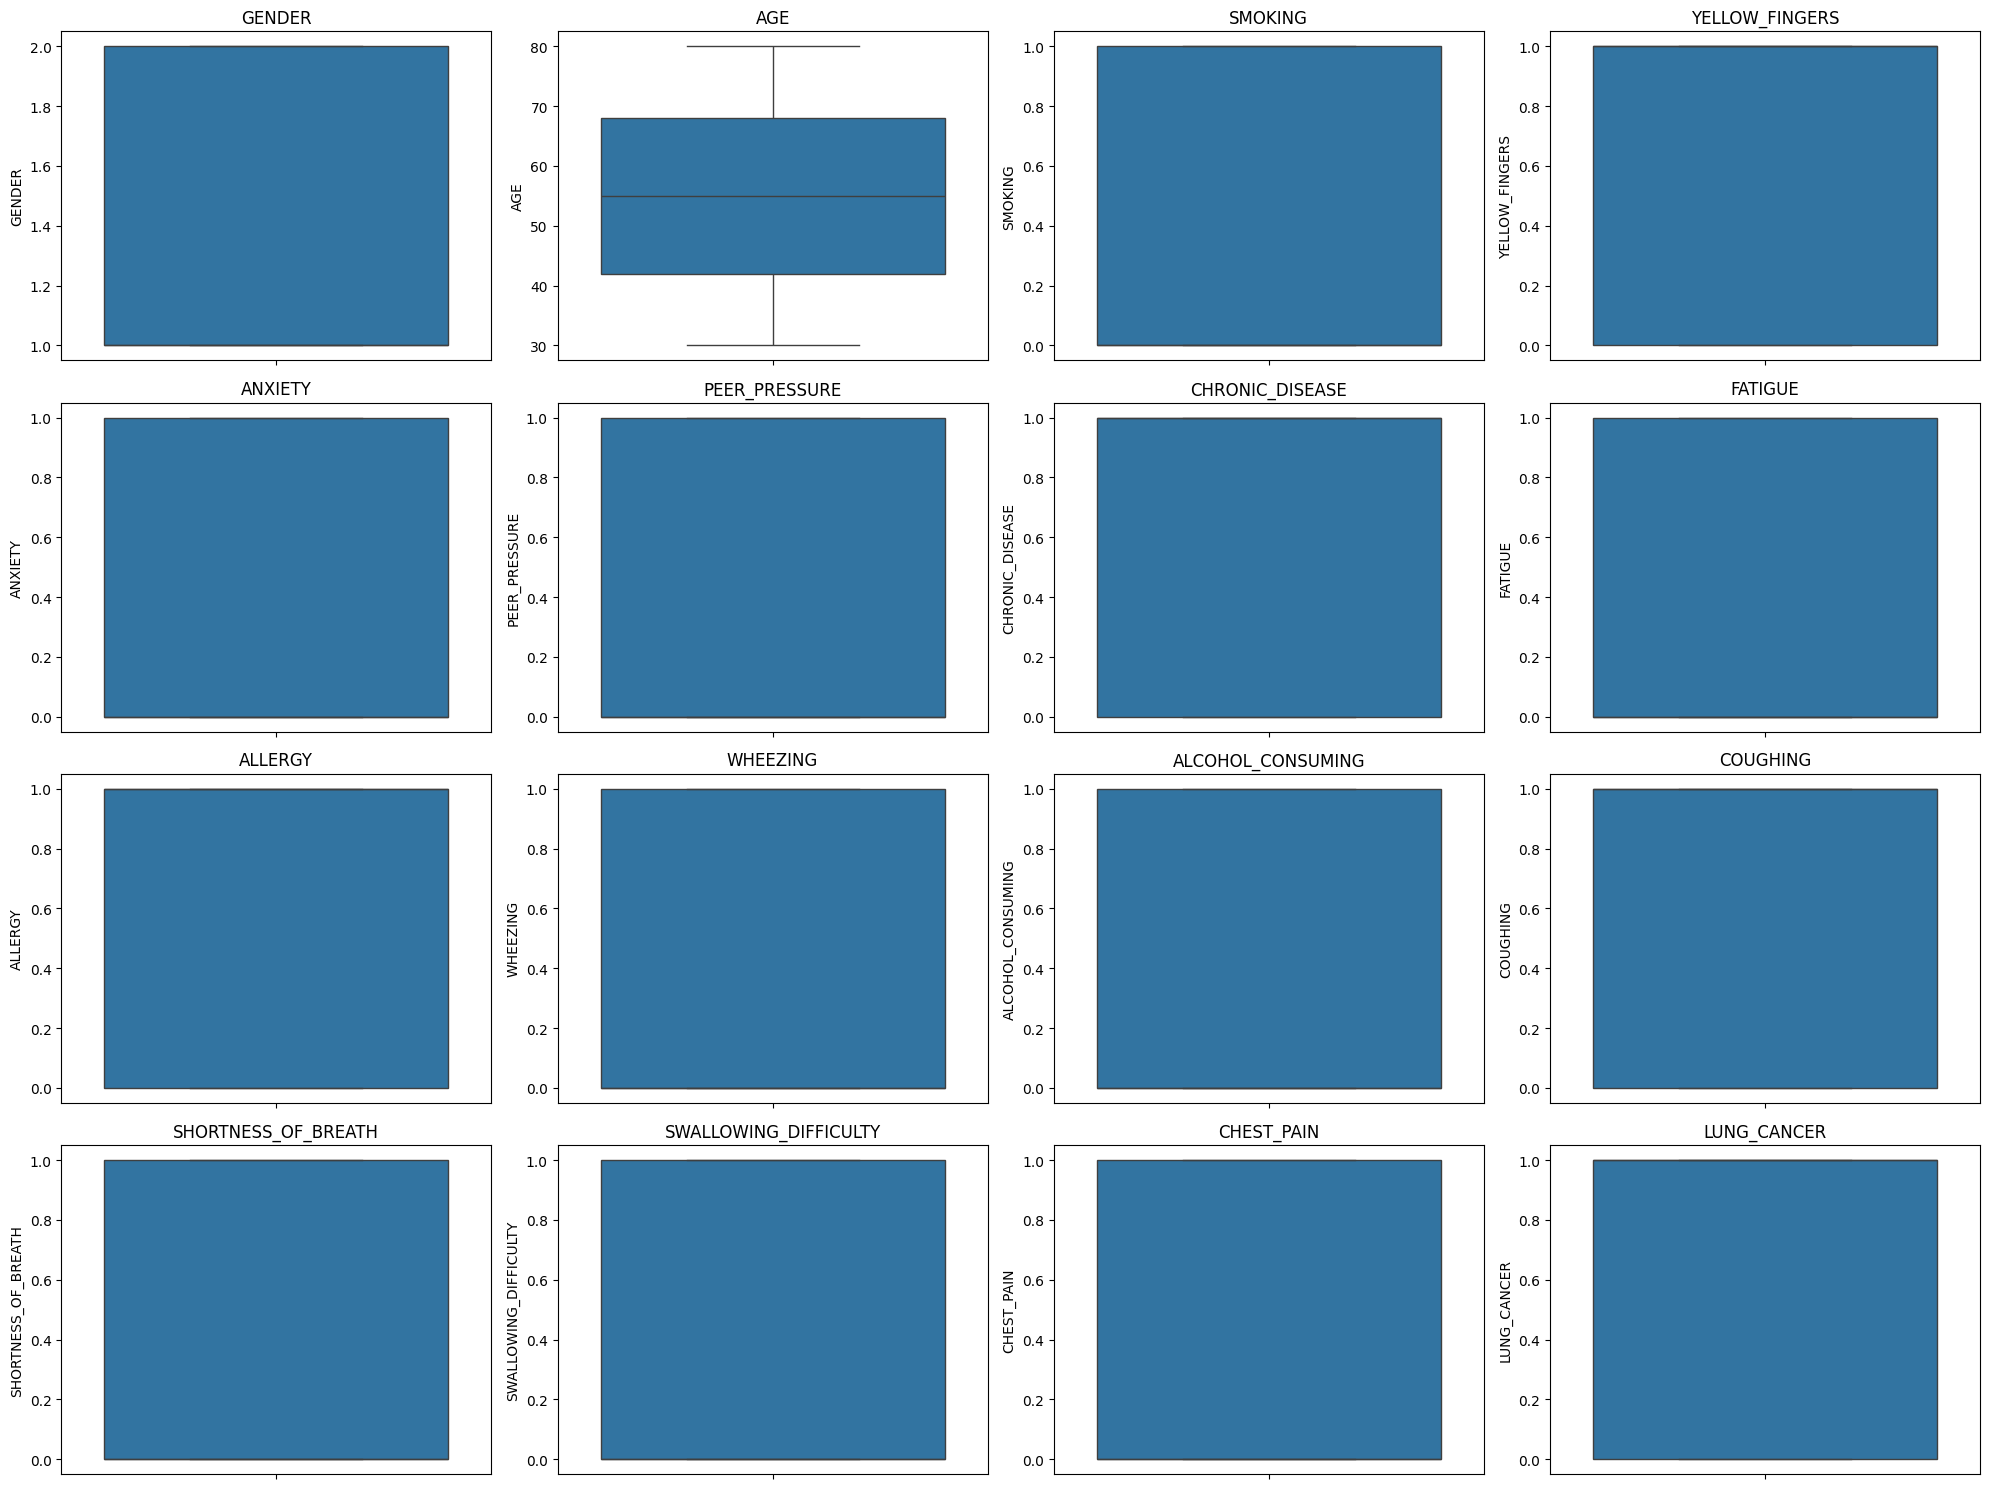

In [ ]:
# Function to remove outliers based on IQR
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Remove outliers
df = remove_outliers(df)

# Plotting box plots for each feature without outliers
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

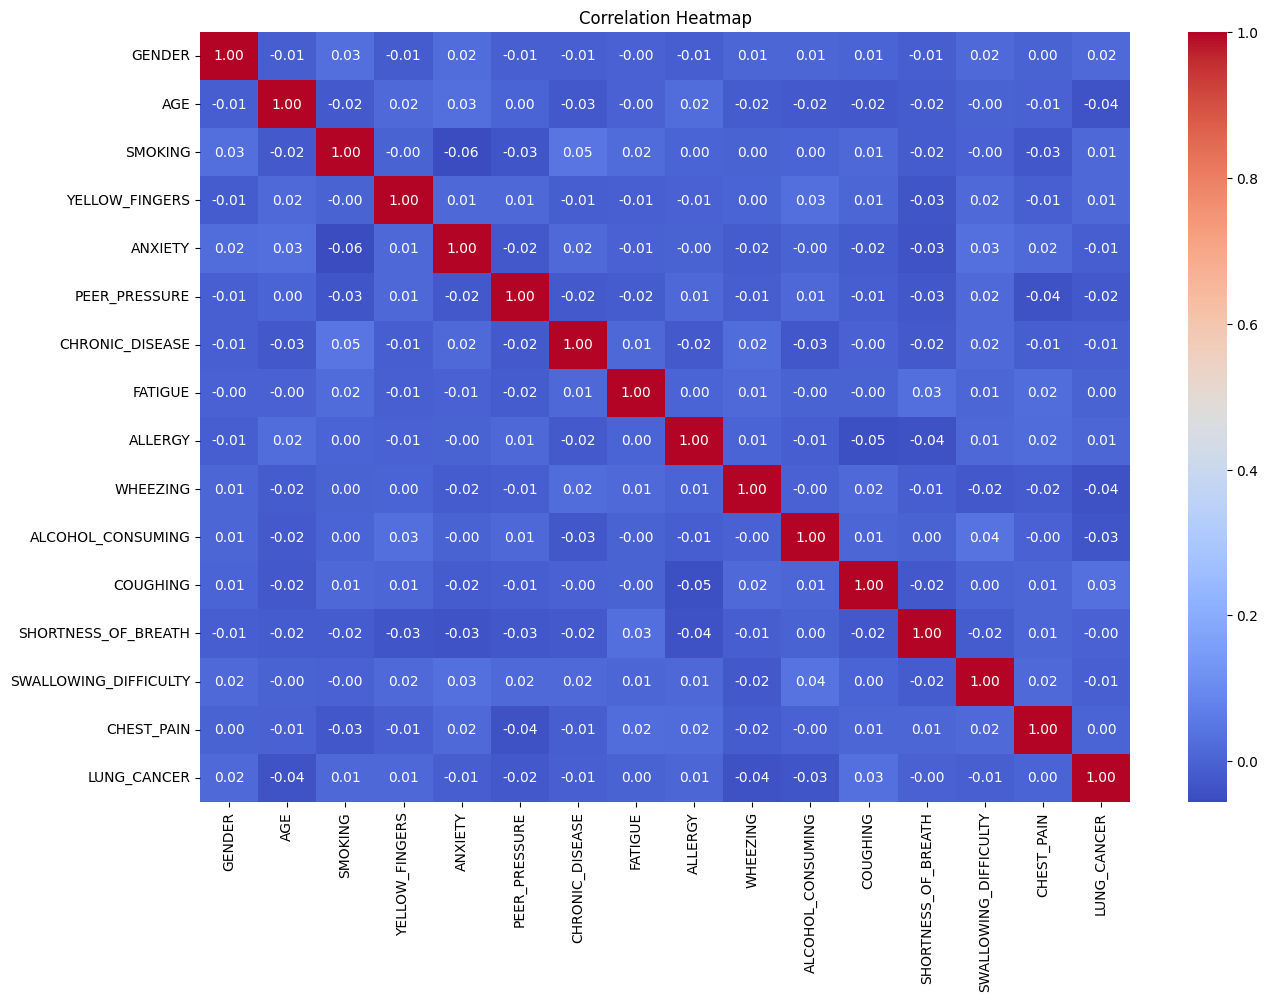

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df2 = pd.DataFrame(df)

# Mapping coded values to real names
df2['GENDER'] = df2['GENDER'].map({1: 'Male', 2: 'Female'})
df2['SMOKING'] = df2['SMOKING'].map({0: 'Non-Smoker', 1: 'Smoker'})
df2['LUNG_CANCER'] = df2['LUNG_CANCER'].map({0: 'No', 1: 'Yes'})


In [ ]:
# Plotly Pie Chart for Lung Cancer Distribution
fig2 = px.pie(df2, names='LUNG_CANCER', title='Lung Cancer Distribution')
fig2.show()

In [ ]:
# Plotly Box Plot for Age Distribution by Smoking Status
fig3 = px.box(df2, x='SMOKING', y='AGE', title='Age Distribution by Smoking Status')
fig3.show()

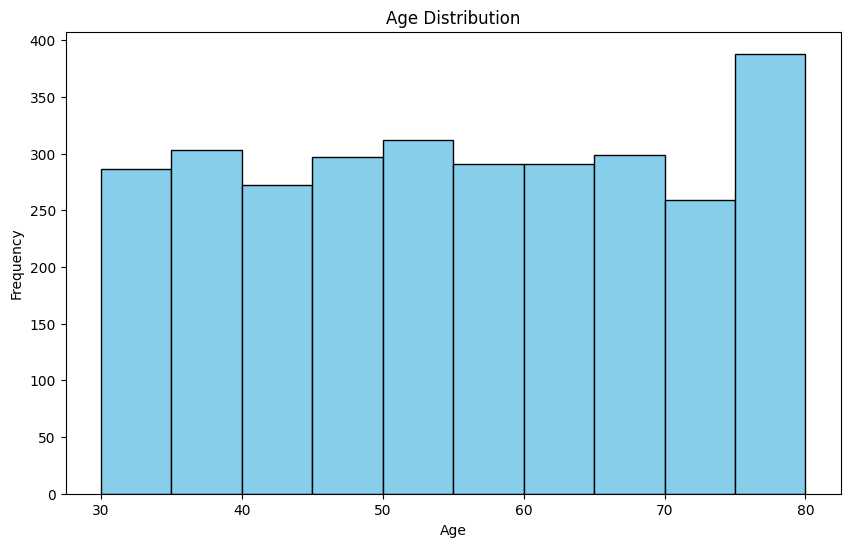

In [ ]:
# Histogram for Age
plt.figure(figsize=(10, 6))
plt.hist(df2['AGE'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

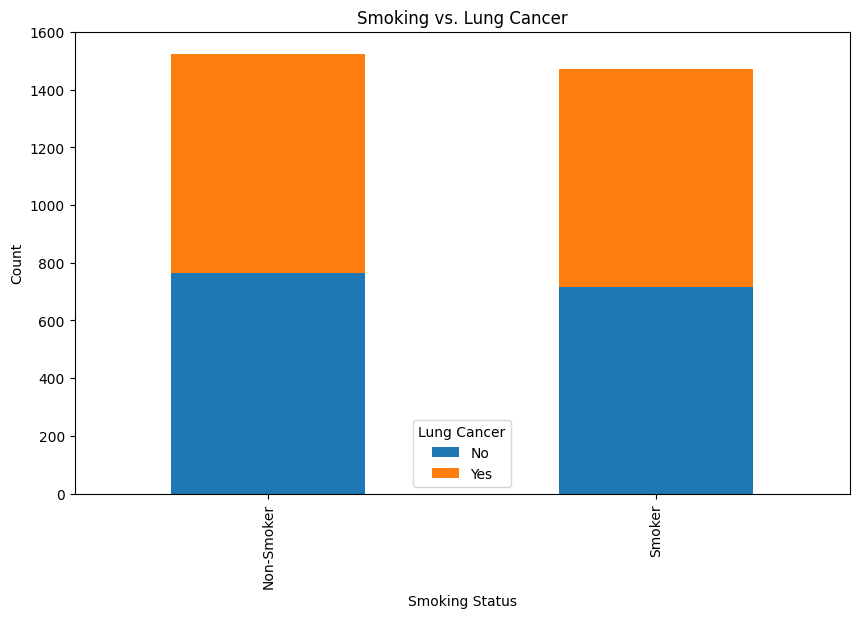

In [ ]:
# Bar Plot for Smoking vs. Lung Cancer
smoking_lung_cancer = df2.groupby('SMOKING')['LUNG_CANCER'].value_counts().unstack()
smoking_lung_cancer.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Smoking vs. Lung Cancer')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Lung Cancer')
plt.show()

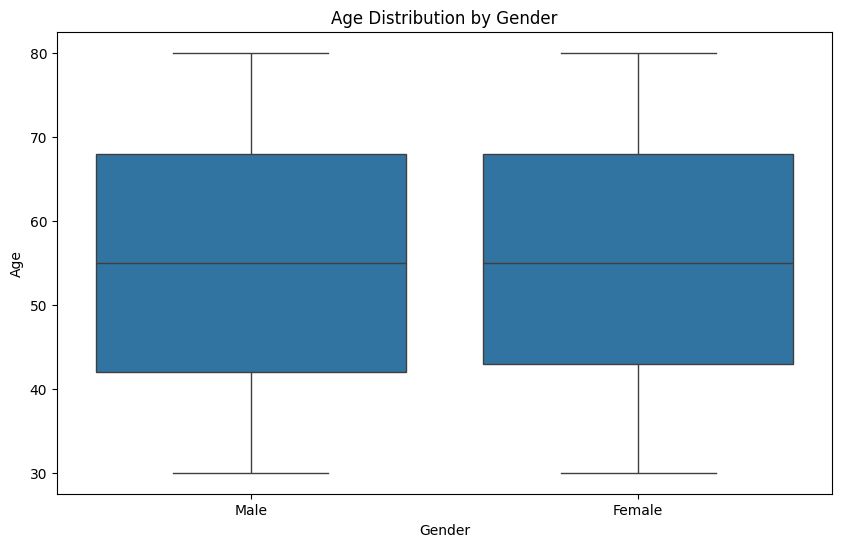

In [ ]:
# Box Plot for Age by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='GENDER', y='AGE', data=df2)
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

In [ ]:
# Plotly Histogram for Age Distribution
fig_histogram = px.histogram(df2, x='AGE', title='Age Distribution')
fig_histogram.show()

In [ ]:
# Plotly Sunburst Chart for Gender and Smoking Status in Relation to Lung Cancer
fig_sunburst = px.sunburst(
    df2,
    path=['GENDER', 'SMOKING', 'LUNG_CANCER'],
    title='Gender and Smoking Status in Relation to Lung Cancer'
)
fig_sunburst.show()

In [ ]:
# Plotly Violin Plot for Age Distribution by Anxiety Status and Peer Pressure
fig_violin = px.violin(df2, y='AGE', x='ANXIETY', color='PEER_PRESSURE', box=True, points="all",
                       title='Age Distribution by Anxiety Status and Peer Pressure')
fig_violin.update_layout(xaxis_title='Anxiety Status (0: No, 1: Yes)', yaxis_title='Age')
fig_violin.show()

# **XGBOOST**

Accuracy: 0.51
Precision: 0.51
Recall: 0.54
F1 Score: 0.53
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.48      0.50       300
           1       0.51      0.54      0.53       300

    accuracy                           0.51       600
   macro avg       0.51      0.51      0.51       600
weighted avg       0.51      0.51      0.51       600

Confusion Matrix:
[[144 156]
 [137 163]]


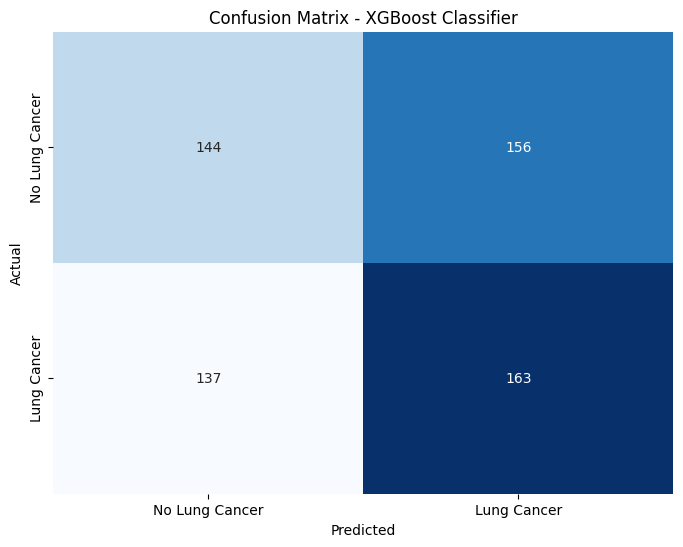

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
# Separate features (X) and target variable (y)
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the XGBoost classifier
model_xgb = XGBClassifier(random_state=42)

# Train the model
model_xgb.fit(X_train, y_train)
# Predict on the test set
y_pred = model_xgb.predict(X_test)

# Calculate evaluation metrics
accuracy_xgb = accuracy_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred)
f1score_xgb = f1_score(y_test, y_pred)
classification_report_xgb = classification_report(y_test, y_pred)
conf_matrix_xgb = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy_xgb:.2f}")
print(f"Precision: {precision_xgb:.2f}")
print(f"Recall: {recall_xgb:.2f}")
print(f"F1 Score: {f1score_xgb:.2f}")
print("Classification Report:")
print(classification_report_xgb)
print("Confusion Matrix:")
print(conf_matrix_xgb)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['No Lung Cancer', 'Lung Cancer'],
            yticklabels=['No Lung Cancer', 'Lung Cancer'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost Classifier')
plt.show()


# **GBM**

Accuracy: 0.56
Precision: 0.55
Recall: 0.60
F1 Score: 0.58
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.51      0.53       300
           1       0.55      0.60      0.58       300

    accuracy                           0.56       600
   macro avg       0.56      0.56      0.55       600
weighted avg       0.56      0.56      0.55       600

Confusion Matrix:
[[152 148]
 [119 181]]


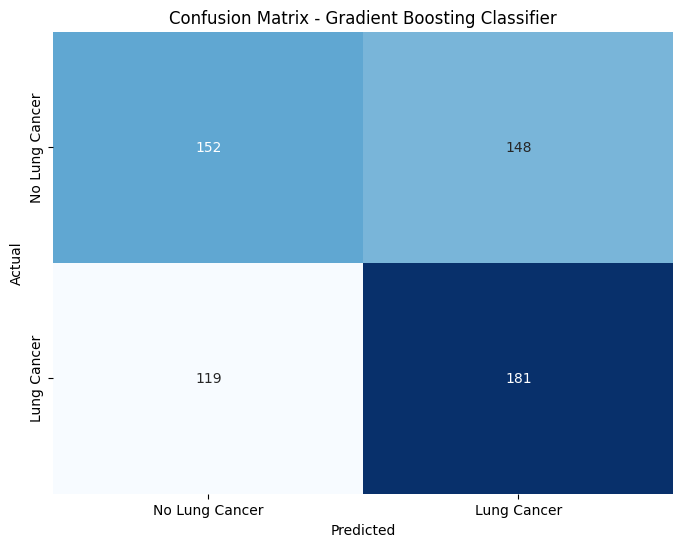

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Initialize the Gradient Boosting Classifier
model_gbm = GradientBoostingClassifier(random_state=42)

# Train the model
model_gbm.fit(X_train, y_train)

# Now predict on the test set
y_pred = model_gbm.predict(X_test)

# Calculate evaluation metrics
accuracy_gbm = accuracy_score(y_test, y_pred)
precision_gbm = precision_score(y_test, y_pred)
recall_gbm = recall_score(y_test, y_pred)
f1score_gbm = f1_score(y_test, y_pred)
classification_report_gbm = classification_report(y_test, y_pred)
conf_matrix_gbm = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy_gbm:.2f}")
print(f"Precision: {precision_gbm:.2f}")
print(f"Recall: {recall_gbm:.2f}")
print(f"F1 Score: {f1score_gbm:.2f}")
print("Classification Report:")
print(classification_report_gbm)
print("Confusion Matrix:")
print(conf_matrix_gbm)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbm, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['No Lung Cancer', 'Lung Cancer'],
            yticklabels=['No Lung Cancer', 'Lung Cancer'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.show()




# **RANDOM FOREST**

Accuracy: 0.51
Precision: 0.51
Recall: 0.53
F1 Score: 0.52
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.49      0.50       300
           1       0.51      0.53      0.52       300

    accuracy                           0.51       600
   macro avg       0.51      0.51      0.51       600
weighted avg       0.51      0.51      0.51       600

Confusion Matrix:
[[148 152]
 [141 159]]


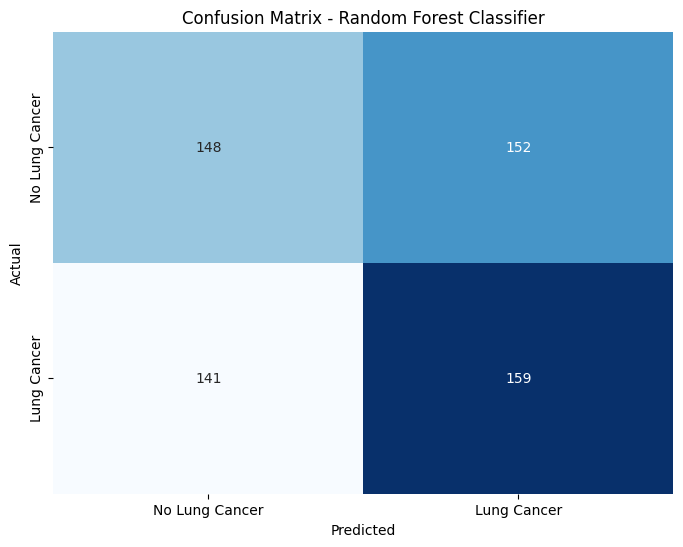

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest classifier
model_rf = RandomForestClassifier(random_state=42)

# Train the model
model_rf.fit(X_train, y_train)
# Predict on the test set
y_pred = model_rf.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1score_rf = f1_score(y_test, y_pred)
classification_report_rf = classification_report(y_test, y_pred)
conf_matrix_rf = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1score_rf:.2f}")
print("Classification Report:")
print(classification_report_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['No Lung Cancer', 'Lung Cancer'],
            yticklabels=['No Lung Cancer', 'Lung Cancer'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()


# **NAIVE BAYES**

Accuracy: 0.52
Precision: 0.51
Recall: 0.56
F1 Score: 0.54
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.47      0.49       300
           1       0.51      0.56      0.54       300

    accuracy                           0.52       600
   macro avg       0.52      0.52      0.51       600
weighted avg       0.52      0.52      0.51       600

Confusion Matrix:
[[141 159]
 [132 168]]


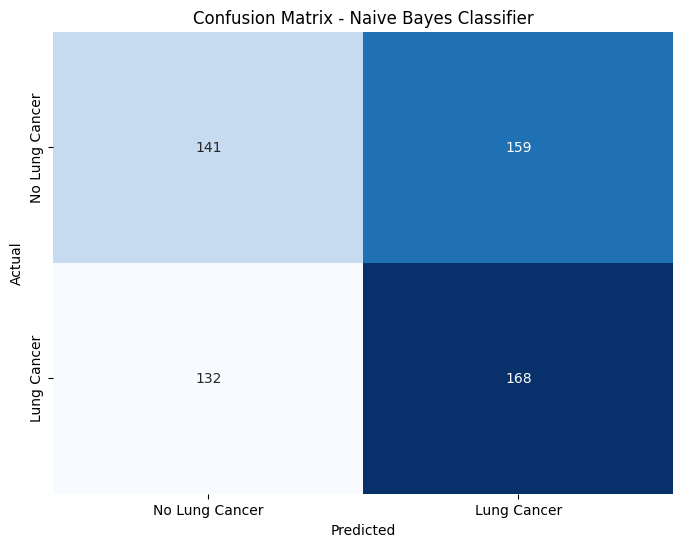

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes classifier
model_nb = GaussianNB()

# Train the model
model_nb.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = model_nb.predict(X_test)

# Calculate evaluation metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1score_nb = f1_score(y_test, y_pred_nb)
classification_report_nb = classification_report(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Print the evaluation metrics
print(f"Accuracy: {accuracy_nb:.2f}")
print(f"Precision: {precision_nb:.2f}")
print(f"Recall: {recall_nb:.2f}")
print(f"F1 Score: {f1score_nb:.2f}")
print("Classification Report:")
print(classification_report_nb)
print("Confusion Matrix:")
print(conf_matrix_nb)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['No Lung Cancer', 'Lung Cancer'],
            yticklabels=['No Lung Cancer', 'Lung Cancer'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes Classifier')
plt.show()


In [ ]:
import joblib

# Save the trained Gradient Boosting Classifier model to a file
joblib.dump(model_nb, 'naive_bayes.pkl')

['naive_bayes.pkl']

In [ ]:
import joblib

# Load the model from the file
loaded_model = joblib.load('naive_bayes.pkl')

# Function to convert user input to model input
def convert_user_input(gender, age, smoking, yellow_fingers, anxiety, peer_pressure, chronic_disease, fatigue, allergy, wheezing, alcohol_consuming, coughing, shortness_of_breath, swallowing_difficulty, chest_pain):
    gender = 1 if gender.lower() == 'male' else 2
    smoking = 1 if smoking.lower() == 'yes' else 0
    yellow_fingers = 1 if yellow_fingers.lower() == 'yes' else 0
    anxiety = 1 if anxiety.lower() == 'yes' else 0
    peer_pressure = 1 if peer_pressure.lower() == 'yes' else 0
    chronic_disease = 1 if chronic_disease.lower() == 'yes' else 0
    fatigue = 1 if fatigue.lower() == 'yes' else 0
    allergy = 1 if allergy.lower() == 'yes' else 0
    wheezing = 1 if wheezing.lower() == 'yes' else 0
    alcohol_consuming = 1 if alcohol_consuming.lower() == 'yes' else 0
    coughing = 1 if coughing.lower() == 'yes' else 0
    shortness_of_breath = 1 if shortness_of_breath.lower() == 'yes' else 0
    swallowing_difficulty = 1 if swallowing_difficulty.lower() == 'yes' else 0
    chest_pain = 1 if chest_pain.lower() == 'yes' else 0

    return [gender, age, smoking, yellow_fingers, anxiety, peer_pressure, chronic_disease, fatigue, allergy, wheezing, alcohol_consuming, coughing, shortness_of_breath, swallowing_difficulty, chest_pain]

# Function to predict lung cancer based on user input
def predict_lung_cancer(user_input):
    # Assuming user_input is a list of feature values
    prediction = loaded_model.predict([user_input])
    print(prediction
          )
    return "You have Lung Cancer" if prediction[0] == 1 else "You don't have Lung Cancer"

# Get user input dynamically
def get_user_input():
    gender = input("Enter gender (male/female): ")
    age = int(input("Enter age: "))
    smoking = input("Do you smoke? (yes/no): ")
    yellow_fingers = input("Do you have yellow fingers? (yes/no): ")
    anxiety = input("Do you have anxiety? (yes/no): ")
    peer_pressure = input("Do you experience peer pressure? (yes/no): ")
    chronic_disease = input("Do you have a chronic disease? (yes/no): ")
    fatigue = input("Do you experience fatigue? (yes/no): ")
    allergy = input("Do you have allergies? (yes/no): ")
    wheezing = input("Do you wheeze? (yes/no): ")
    alcohol_consuming = input("Do you consume alcohol? (yes/no): ")
    coughing = input("Do you cough? (yes/no): ")
    shortness_of_breath = input("Do you have shortness of breath? (yes/no): ")
    swallowing_difficulty = input("Do you have difficulty swallowing? (yes/no): ")
    chest_pain = input("Do you have chest pain? (yes/no): ")

    return convert_user_input(
        gender, age, smoking, yellow_fingers, anxiety, peer_pressure, chronic_disease, fatigue, allergy, wheezing, alcohol_consuming, coughing, shortness_of_breath, swallowing_difficulty, chest_pain
    )

# Get user input
user_input = get_user_input()

# Make prediction
result = predict_lung_cancer(user_input)
print(result)


Enter gender (male/female): male
Enter age: 55
Do you smoke? (yes/no): no
Do you have yellow fingers? (yes/no): yes
Do you have anxiety? (yes/no): yes
Do you experience peer pressure? (yes/no): no
Do you have a chronic disease? (yes/no): yes
Do you experience fatigue? (yes/no): no
Do you have allergies? (yes/no): no
Do you wheeze? (yes/no): yes
Do you consume alcohol? (yes/no): yes
Do you cough? (yes/no): no
Do you have shortness of breath? (yes/no): yes
Do you have difficulty swallowing? (yes/no): yes
Do you have chest pain? (yes/no): no
[0]
You don't have Lung Cancer
